In [92]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [39]:
tissue_df = pd.read_csv("../psl/data/master_data_percent/is_tissue.txt", 
                        delimiter="\t", header=None)
sensitive_df = pd.read_csv("../psl/data/master_data_percent/essential_overlap/sensitive_truth.txt",
                          delimiter="\t", header=None)

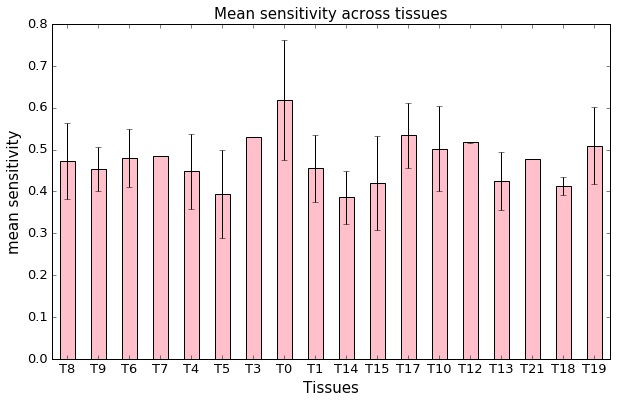

** some tissues have 0 standard deviation because there is only one cell in that tissue type


In [119]:
# average sensitivity to all drugs
def process_data(df, tissue_df):
    drugs = set(df[1])
    cells = set(df[0])
    rows = []
    for cell in set(cells):
        tissue = tissue_df[tissue_df[0]==cell].iloc[0][1]
        rows.append({"tissue": tissue,
                     "sensitivity": np.mean(df[df[0]==cell][2])})
    df2 = pd.DataFrame(rows, columns=["tissue", "sensitivity"])
    rows = []
    tissues = set(df2["tissue"])
    for tissue in tissues:
        rows.append({"tissue": tissue,
                    "mean": np.mean(df2[df2["tissue"]==tissue]["sensitivity"]),
                    "std": np.std(df2[df2["tissue"]==tissue]["sensitivity"])})
    
    result_df = pd.DataFrame(rows, columns=["tissue", "mean", "std"])
    result_df.set_index("tissue", inplace=True)
    return result_df.transpose()


df = process_data(sensitive_df, tissue_df)

plt.figure(1, figsize=(10,6))
df.loc['mean'].plot.bar(yerr=df.loc["std"], rot=0, color="pink", fontsize=13)
plt.ylabel("mean sensitivity", fontsize=15)
plt.xlabel("Tissues", fontsize=15)
plt.title("Mean sensitivity across tissues", fontsize=15)
plt.show()
print "** some tissues have 0 standard deviation because there is only one cell in that tissue type"

In [21]:
# sensitivity to individual drugs